<a href="https://colab.research.google.com/github/erenkorkmaz06/coding-exercises/blob/main/XGBoost_Vergi_Gelir_Tahmin_Son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

veri = pd.read_csv('/content/Vergi_Veri2.csv',index_col=0)
print(veri)

            Vergi Gelir  Vergi Gelir 12G  Tüfe 12G      Üfe 12G  \
2007-02-28   11540191.0       11179272.0    123.84   123.830503   
2007-03-31   11324450.0        9937892.0    124.18   124.137554   
2007-04-30    9859064.0        9591739.0    125.84   126.544434   
2007-05-31   15423193.0       14008043.0    128.20   130.050753   
2007-06-30   11363950.0       11124192.0    128.63   135.280516   
...                 ...              ...       ...          ...   
2023-08-31  543182902.0      271857698.0   1015.65  1780.050000   
2023-09-30  386223894.0      173468233.0   1046.89  1865.090000   
2023-10-31  409426701.0      181806347.0   1084.00  2011.130000   
2023-11-30  668493162.0      312001112.0   1115.26  2026.080000   
2023-12-31  440911128.0      211513762.0   1128.45  2021.190000   

            B ve C ort 12G  Aylık İTO Enf 12G  Dolar 12G  Brent*DolatTL 12G  \
2007-02-28          -0.945               0.46   1.320160          78.919165   
2007-03-31          -0.260           

In [ ]:
y = veri['Vergi Gelir']
x = veri.drop(columns=["Vergi Gelir","Ticar Kredi Faiz 12G","M3 Değişim 12G","B ve C ort 12G"])

train_size = int(x.shape[0]*0.75)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]
print(x_train)
print(y_train)

            Vergi Gelir 12G  Tüfe 12G     Üfe 12G  Aylık İTO Enf 12G  \
2007-02-28       11179272.0    123.84  123.830503               0.46   
2007-03-31        9937892.0    124.18  124.137554               0.17   
2007-04-30        9591739.0    125.84  126.544434               1.20   
2007-05-31       14008043.0    128.20  130.050753               2.29   
2007-06-30       11124192.0    128.63  135.280516               1.75   
...                     ...       ...         ...                ...   
2019-05-31       61218542.0    348.34  354.850000               2.60   
2019-06-30       42749559.0    357.44  365.600000               1.40   
2019-07-31       54360053.0    359.41  372.060000               0.91   
2019-08-31       60934207.0    367.66  396.620000               3.80   
2019-09-30       49235735.0    390.84  439.780000               6.47   

            Dolar 12G  Brent*DolatTL 12G  Altın 12G  İş Gücü 12G  \
2007-02-28   1.320160          78.919165      23.76      20300.0   

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Test R2: ", r2_score(y_test, y_pred))

MSE:  3.490877813859206e+16
Test R2:  -0.6944287236060926


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500]
max_depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
booster=['gbtree','gblinear']
learning_rate=np.arange(0,1,0.0001)
min_child_weight=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
base_score=[0.25,0.5,0.75,1]
max_leaves=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
gamma=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,]
max_delta_step=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
subsample=[0.5,0.6,0.7,0.8,0.9,1]
colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    "base_score":base_score,
    "max_leaves":max_leaves,
    "gamma":gamma,
    "max_delta_step":max_delta_step,
    "subsample":subsample,
    "colsample_bytree":colsample_bytree
    }




random_cv = RandomizedSearchCV(estimator=xgb_model,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=1000,
            scoring = 'neg_mean_squared_error',n_jobs = -1,
            verbose = 5,
            return_train_score = True,
            random_state=42)

random_cv.fit(x_train,y_train)
print(random_cv.best_estimator_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
XGBRegressor(base_score=1, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.6, grow_policy=None, importance_type=None,
             interaction_constraints=None,
             learning_rate=np.float64(0.35660000000000003), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=19,
             max_depth=11, max_leaves=15, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [ ]:
from sklearn.metrics import root_mean_squared_error
xgb_model_tuned = xgb.XGBRegressor(base_score=0.25, booster='gblinear',gamma=0.8,
             learning_rate=0.995,n_estimators=200)
xgb_model_tuned.fit(x_train,y_train)

XGBRegressor(base_score=0.25, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.8, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.995, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model_tuned.predict(x_test)
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_train, xgb_model_tuned.predict(x_train)))
print("Test R2: ", r2_score(y_test, y_pred))
print("Train R2: ", r2_score(y_train, xgb_model_tuned.predict(x_train)))

RMSE:  63960187.3212112
RMSE:  2912844.2720046677
Test R2:  0.801432526152263
Train R2:  0.9573975126438617


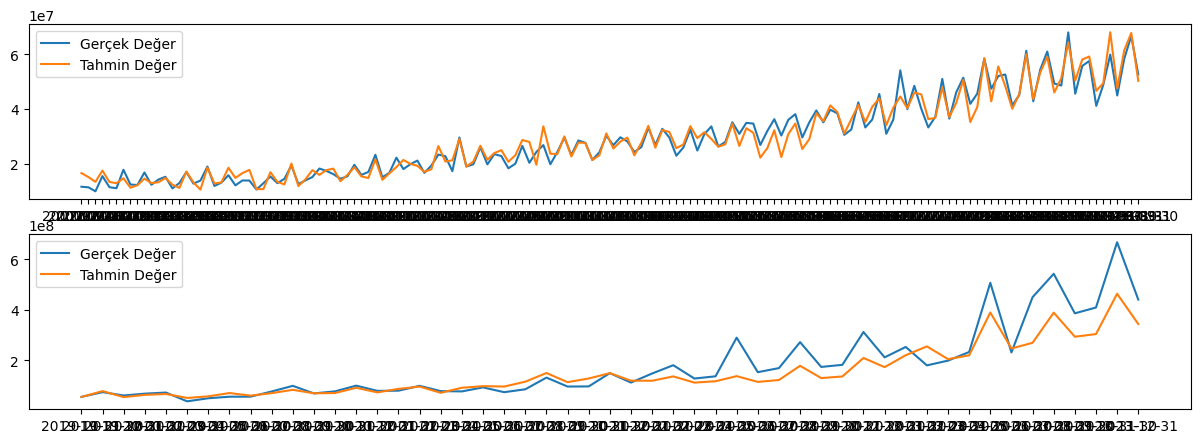

In [ ]:
traintahmin = xgb_model_tuned.predict(x_train)
testtahmin = xgb_model_tuned.predict(x_test)

fig,axs = plt.subplots(2,1,figsize=(15,5))
axs[0].plot(y_train,label="Gerçek Değer")
axs[0].plot(traintahmin,label="Tahmin Değer")
axs[0].legend()
axs[1].plot(y_test,label="Gerçek Değer")
axs[1].plot(testtahmin,label="Tahmin Değer")
axs[1].legend()
plt.show()

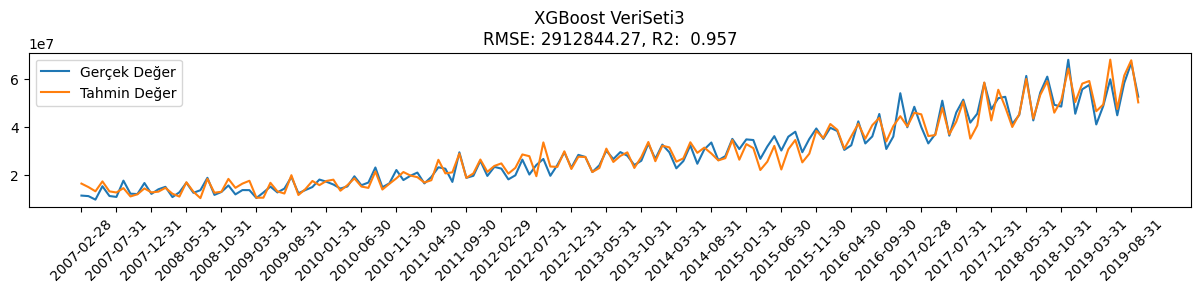

In [ ]:
fig,axs= plt.subplots(1,1,figsize=(15,2))
axs.plot(y_train,label="Gerçek Değer")
axs.plot(traintahmin,label="Tahmin Değer")
axs.set_title("XGBoost VeriSeti3\nRMSE: 2912844.27, R2:  0.957")
axs.legend()
axs.set_xticks(axs.get_xticks()[::5])
axs.tick_params(axis='x', rotation=45)
plt.show()

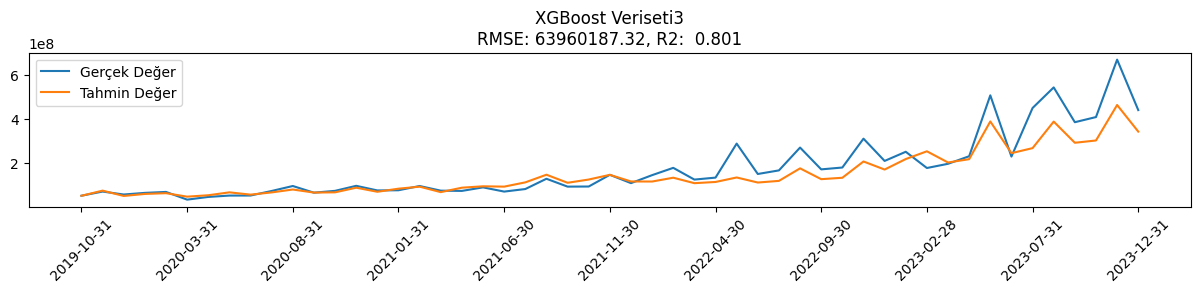

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(15,2))
axs.plot(y_test,label="Gerçek Değer")
axs.plot(testtahmin,label="Tahmin Değer")
axs.set_title("XGBoost Veriseti3\nRMSE: 63960187.32, R2:  0.801")
axs.legend()
axs.set_xticks(axs.get_xticks()[::5])
axs.tick_params(axis='x', rotation=45)

RMSE:  113040103.74570416
Test R2:  0.4338147686228958


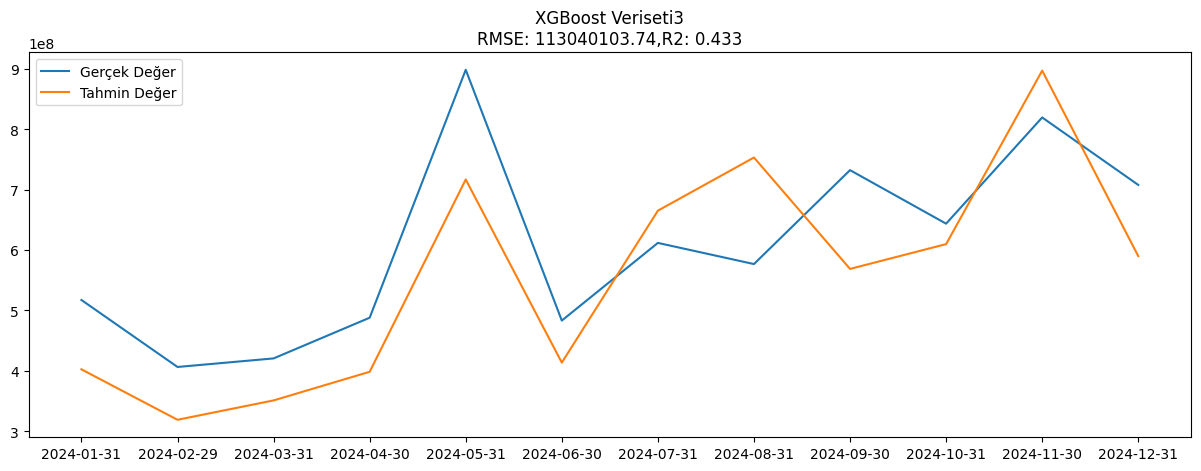

In [ ]:
from sklearn.metrics import root_mean_squared_error
veri_kont = pd.read_csv("/content/Vergi_Kontrol_Veri2.csv",index_col=0)

x_kont = veri_kont.drop(columns=["Vergi Gelir","Ticar Kredi Faiz 12G","M3 Değişim 12G","B ve C ort 12G"])
y_kont = veri_kont["Vergi Gelir"]

y_kont_pred = xgb_model_tuned.predict(x_kont)
print("RMSE: ",root_mean_squared_error(y_kont, y_kont_pred))
print("Test R2: ", r2_score(y_kont, y_kont_pred))

fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(y_kont,label="Gerçek Değer")
axs.plot(y_kont_pred,label="Tahmin Değer")
axs.set_title("XGBoost Veriseti3\nRMSE: 113040103.74,R2: 0.433")
axs.legend()
plt.show()

In [ ]:
y_kont_pred_series = pd.Series(y_kont_pred, index=y_kont.index, name="Tahmin Değer")
df = pd.concat([pd.DataFrame(y_kont), pd.DataFrame(y_kont_pred_series)], axis=1)
df.columns = ["Gerçek", "Tahmin"]

print(df)

                 Gerçek       Tahmin
2024-01-31  517201252.0  402360032.0
2024-02-29  406290761.0  318852512.0
2024-03-31  420467894.0  350908064.0
2024-04-30  487855875.0  398313984.0
2024-05-31  898423555.0  716717376.0
2024-06-30  483125770.0  413527328.0
2024-07-31  611740665.0  665119424.0
2024-08-31  576708862.0  753123200.0
2024-09-30  732243893.0  568678080.0
2024-10-31  643604522.0  609723008.0
2024-11-30  819445921.0  897029056.0
2024-12-31  707754082.0  589884480.0


In [ ]:
vergi_2024_veri = pd.read_csv("/content/Vergi_2024_Veri2.csv",index_col=0)
vergi_2025 = pd.read_csv("/content/Vergi_2025.csv",index_col=0)

In [ ]:
vergi_2024_veri = vergi_2024_veri.drop(columns=["Ticar Kredi Faiz 12G","M3 Değişim 12G","B ve C ort 12G"])

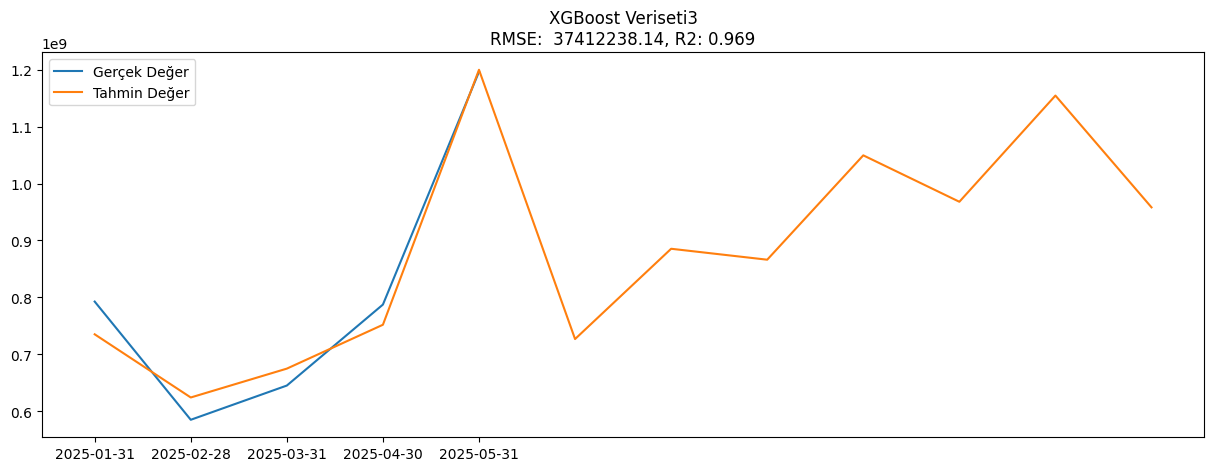

In [ ]:
vergi_2025_pred = xgb_model_tuned.predict(vergi_2024_veri)

fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(vergi_2025["TP_KB_GEN02"],label="Gerçek Değer")
axs.plot(vergi_2025_pred,label="Tahmin Değer")
axs.set_title("XGBoost Veriseti3\nRMSE:  37412238.14, R2: 0.969")
axs.legend()
plt.show()

In [ ]:
print("RMSE: ",root_mean_squared_error(vergi_2025["TP_KB_GEN02"], vergi_2025_pred[:5]))
print("Test R2: ", r2_score(vergi_2025["TP_KB_GEN02"], vergi_2025_pred[:5]))

RMSE:  37412238.14041128
Test R2:  0.9692489498118001


In [ ]:
print(vergi_2025)

             Tarih   TP_KB_GEN02
2025-01-31  2025-1  7.926672e+08
2025-02-28  2025-2  5.849576e+08
2025-03-31  2025-3  6.451014e+08
2025-04-30  2025-4  7.873917e+08
2025-05-31  2025-5  1.196410e+09


In [ ]:
y = veri[-12:]["Vergi Gelir"]
x = veri.drop(columns=["Vergi Gelir"])[-12:]
y_pred = xgb_model_tuned.predict(x)

                 Gerçek       Tahmin
2023-01-31  252826266.0  219994848.0
2023-02-28  179619616.0  255009072.0
2023-03-31  198589740.0  204497008.0
2023-04-30  232703841.0  219490720.0
2023-05-31  507413997.0  389591072.0
2023-06-30  231158228.0  246682800.0
2023-07-31  450316111.0  269316576.0
2023-08-31  543182902.0  389003712.0
2023-09-30  386223894.0  293497792.0
2023-10-31  409426701.0  303798080.0
2023-11-30  668493162.0  463849344.0
2023-12-31  440911128.0  343934400.0
RMSE:  111304902.6854992
Test R2:  0.4461964451906505


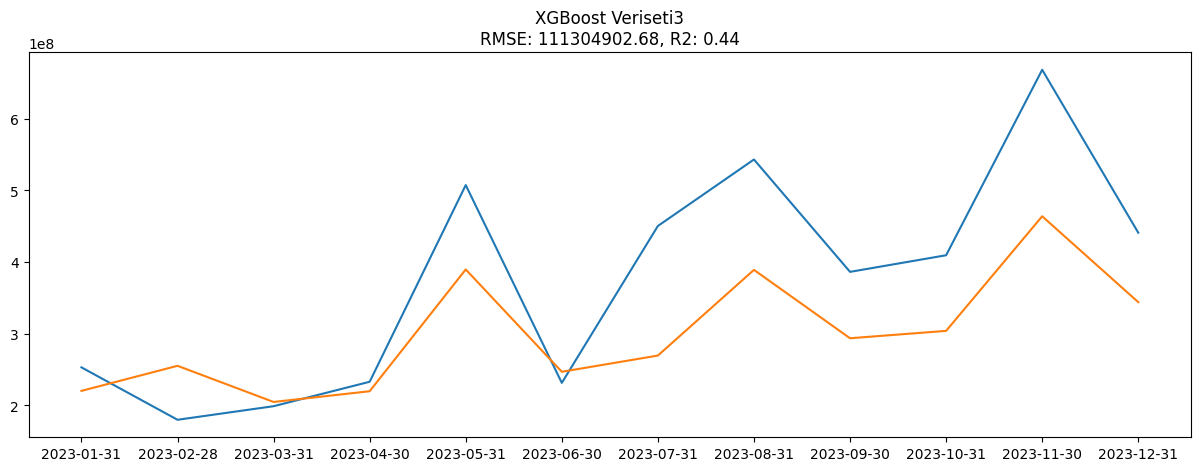

In [ ]:
df = pd.DataFrame({"Gerçek": y, "Tahmin": y_pred})
print(df)

print("RMSE: ", root_mean_squared_error(df["Gerçek"], df['Tahmin']))
print("Test R2: ", r2_score(df["Gerçek"], df['Tahmin']))

fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.set_title("XGBoost Veriseti3\nRMSE: 111304902.68, R2: 0.44")
axs.plot(df)
plt.show()

In [ ]:
y_kont_pred_series = pd.Series(y_kont_pred, index=y_kont.index, name="Tahmin Değer")
df2 = pd.concat([pd.DataFrame(y_kont), pd.DataFrame(y_kont_pred_series)], axis=1)
df2.columns = ["Gerçek", "Tahmin"]

print(df2)

                 Gerçek       Tahmin
2024-01-31  517201252.0  402360032.0
2024-02-29  406290761.0  318852512.0
2024-03-31  420467894.0  350908064.0
2024-04-30  487855875.0  398313984.0
2024-05-31  898423555.0  716717376.0
2024-06-30  483125770.0  413527328.0
2024-07-31  611740665.0  665119424.0
2024-08-31  576708862.0  753123200.0
2024-09-30  732243893.0  568678080.0
2024-10-31  643604522.0  609723008.0
2024-11-30  819445921.0  897029056.0
2024-12-31  707754082.0  589884480.0


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
df3 = pd.concat([df, df2])


print("RMSE: ", root_mean_squared_error(df3["Gerçek"], df3['Tahmin']))
print("Test R2: ", r2_score(df3["Gerçek"], df3['Tahmin']))

print(df3)

RMSE:  112175858.4024834
Test R2:  0.6516171969662574
                 Gerçek       Tahmin
2023-01-31  252826266.0  219994848.0
2023-02-28  179619616.0  255009072.0
2023-03-31  198589740.0  204497008.0
2023-04-30  232703841.0  219490720.0
2023-05-31  507413997.0  389591072.0
2023-06-30  231158228.0  246682800.0
2023-07-31  450316111.0  269316576.0
2023-08-31  543182902.0  389003712.0
2023-09-30  386223894.0  293497792.0
2023-10-31  409426701.0  303798080.0
2023-11-30  668493162.0  463849344.0
2023-12-31  440911128.0  343934400.0
2024-01-31  517201252.0  402360032.0
2024-02-29  406290761.0  318852512.0
2024-03-31  420467894.0  350908064.0
2024-04-30  487855875.0  398313984.0
2024-05-31  898423555.0  716717376.0
2024-06-30  483125770.0  413527328.0
2024-07-31  611740665.0  665119424.0
2024-08-31  576708862.0  753123200.0
2024-09-30  732243893.0  568678080.0
2024-10-31  643604522.0  609723008.0
2024-11-30  819445921.0  897029056.0
2024-12-31  707754082.0  589884480.0


In [ ]:
df3.to_excel("2023-2024_Tahmin_Veriseti3.xlsx")

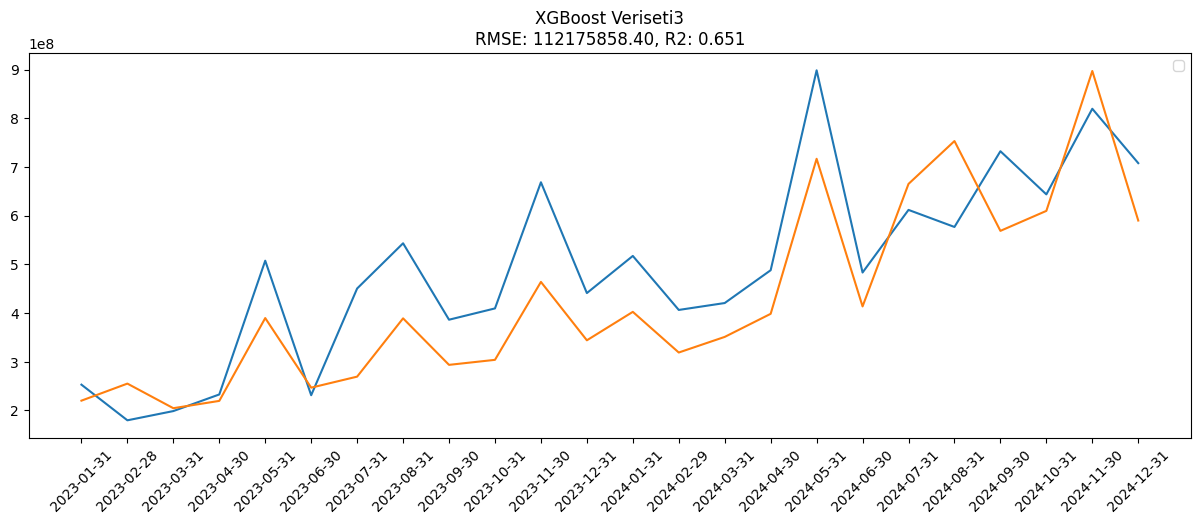

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(df3)
axs.set_xticks(axs.get_xticks()[:24])
axs.tick_params(axis='x', rotation=45)
axs.set_title("XGBoost Veriseti3\nRMSE: 112175858.40, R2: 0.651")
axs.legend()
plt.show()